<a href="https://colab.research.google.com/github/kiannakazemi/Football-Analysis-4/blob/main/FootballAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries.

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read csv file.

In [ ]:
data = files.upload()
df = pd.read_csv(io.StringIO(data['results.csv'].decode('utf-8')))

Saving results.csv to results.csv


The goal_scored function calculates the total goals scored by the choosen team in FIFA World Cup, for example Poland scored 46 times.

The goal_conceded function calculates the total goals conceded by the choosen team in FIFA World Cup, for example Poland conceded 45 times.

In [ ]:
tournament = df[(df['tournament'] == "FIFA World Cup")]
home = pd.unique(tournament['home_team'])
away = pd.unique(tournament['away_team'])
countries = pd.unique(np.concatenate((home,away)))

def goal_scored(team):
  homeTeam = tournament[tournament['home_team'] == team]
  awayTeam = tournament[tournament['away_team'] == team]
  homeGoal = homeTeam.home_score
  awayGoal = awayTeam.away_score
  scored = homeGoal.append(awayGoal)
  goalScored = int(scored.sum())
  return goalScored
 
#goal_scored('Poland')

def goal_conceded(team):
  homeTeam = tournament[tournament['home_team'] == team]
  awayTeam = tournament[tournament['away_team'] == team]
  homeConceded = homeTeam.away_score
  awayConceded = awayTeam.home_score
  conceded = homeConceded.append(awayConceded)
  goalConceded = int(conceded.sum())
  return goalConceded

#goal_conceded('Poland')

The win function calculates the times the choosen team won in FIFA World Cup, for example Poland won 16 times.

The lose function calculates the times the choosen team lost in FIFA World Cup, for example Poland lost 13 times.

In [ ]:
def win(team):
  new_team = tournament[(tournament['home_team'] == team) | (tournament['away_team'] == team)]
  count = 0
  for i, row in new_team.iterrows():
    if row['home_team'] == team:
      if row['home_score'] > row['away_score']:
        count += 1
    elif row['away_team'] == team:
      if row['home_score'] < row['away_score']:
        count += 1
  return count

#win('Poland')

def lose(team):
  new_team = tournament[(tournament['home_team'] == team) | (tournament['away_team'] == team)]
  count = 0
  for i, row in new_team.iterrows():
    if row['home_team'] == team:
      if row['home_score'] < row['away_score']:
        count += 1
    elif row['away_team'] == team:
      if row['home_score'] > row['away_score']:
        count += 1
  return count

#lose('Poland')

I inserted the acquired data into a new dataframe to create a chart. 

For simplicity, I plotted the top 10 teams of the FIFA World Cup.

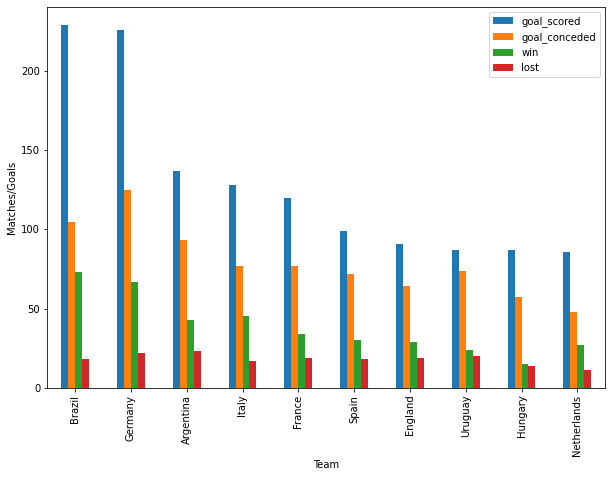

In [ ]:
new_df = pd.DataFrame(columns = ['Team','goal_scored','goal_conceded','win','lost'])
for country in countries:
  gs = goal_scored(country)
  gc = goal_conceded(country)
  w = win(country)
  l = lose(country)
  new_df = new_df.append({'Team': country, 'goal_scored': gs, 'goal_conceded':gc, 'win': w, 'lost': l}, ignore_index = True)

top_teams = new_df.sort_values(by = ['goal_scored', 'goal_conceded'], ascending = False)
top_fifty_teams = top_teams[:10]

top_fifty_teams.plot(x = 'Team', y = ['goal_scored','goal_conceded','win','lost'], kind = "bar", figsize = (10, 7))
plt.ylabel('Matches/Goals')

plt.show()

The frequency_matches function calculates the frequency of matches in different countries, for example the frequency of matches in Italy is 0.07666666666666666.

In [ ]:
countries = pd.unique(tournament['country'])
def frequency_matches(country):
  new_df = tournament[(tournament['country'] == country)]
  return len(new_df)/len(tournament)
#frequency_matches('Italy')

The won_home_matches function calculates the games won at home by the choosen team in FIFA World Cup, for example Poland won 9 times. 

The lost_home_matches function calculates the games lost at home by the choosen team in FIFA World Cup, for example Poland lost 4 times. 

The won_away_matches function calculates the games won away from home by the choosen team in FIFA World Cup, for example Poland won 7 times. 

The lost_away_matches function calculates the games lost away from home by the choosen team in FIFA World Cup, for example Poland lost 9 times. 

In [ ]:
def won_home_matches(team):
  new_df = tournament[(tournament['home_team'] == team)]
  count = 0
  for i, row in new_df.iterrows():
    if row['home_score'] > row['away_score']:
      count +=1
  return count

#won_home_matches('Poland')

def lost_home_matches(team):
  new_df = tournament[(tournament['home_team'] == team)]
  count = 0
  for i, row in new_df.iterrows():
    if row['home_score'] < row['away_score']:
      count += 1
  return count

#lost_home_matches('Poland')

def won_away_matches(team):
  new_df = tournament[(tournament['away_team'] == team)]
  count = 0
  for i, row in new_df.iterrows():
    if row['home_score'] < row['away_score']:
      count +=1
  return count

#won_away_matches('Poland')

def lost_away_matches(team):
  new_df = tournament[(tournament['away_team'] == team)]
  count = 0
  for i, row in new_df.iterrows():
    if row['home_score'] > row['away_score']:
      count += 1
  return count

#lost_away_matches('Poland')

I inserted the acquired data into a new dataframe to create a chart. 

For simplicity, I plotted the first 10 teams of the FIFA World Cup.

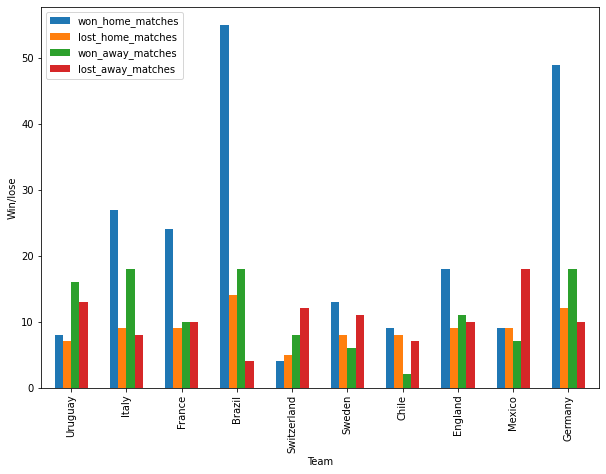

In [ ]:
df_new = pd.DataFrame(columns = ['Team','won_home_matches','lost_home_matches','won_away_matches','lost_away_matches'])
for country in countries:
  whm = won_home_matches(country)
  lhm = lost_home_matches(country)
  wam = won_away_matches(country)
  lam = lost_away_matches(country)
  df_new = df_new.append({'Team': country, 'won_home_matches': whm, 'lost_home_matches':lhm, 'won_away_matches': wam, 'lost_away_matches': lam}, ignore_index = True)

df2 = df_new[:10] 
df2.plot(x='Team', width=0.6, y=['won_home_matches', 'lost_home_matches','won_away_matches','lost_away_matches'], kind="bar",figsize = (10, 7))
plt.ylabel('Win/lose')
plt.show()

In the following chart we can see the percentage of goals scored and goals conceded by Iran.

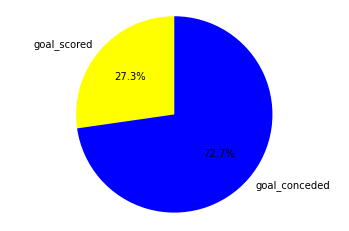

In [ ]:
iran = {"goal_scored": goal_scored('Iran'), "goal_conceded": goal_conceded('Iran')}
fig1, ax1 = plt.subplots()
ax1.pie(iran.values(), labels = iran.keys(), autopct = '%1.1f%%', colors = ("Yellow","Blue"), startangle = 90)
ax1.axis('equal')
plt.show()